Exercise¶

Include your work on the following in this notebook and submit to your Github account.

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1) Setup an appropriate hypothesis test.

2) Compute and report the observed significance value (or p-value).

3) Report statistical significance for $\alpha$ = .01.

4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

5) Look at the scatterplot above.

what are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.
You can compose in notebook cells using Markdown:

In the control panel at the top, choose Cell > Cell Type > Markdown
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet </div>

In [6]:
import numpy as np
from scipy.stats import kstest, normaltest, ttest_1samp, wilcoxon, ranksums, ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats

os.chdir('C:\Users\Rezanick\Desktop\Projects\Springboard\Exercise 2\hospital_readmit\data')
df = pd.read_csv('cms_hospital_readmissions.csv')


In [7]:
df=df[['Number of Discharges','Excess Readmission Ratio']]


There are observations with 'Nan' and 'Not Available' values so the dataset has to be cleaned first.

In [100]:
df=df.dropna(axis=0, how='any')

df=df[df['Number of Discharges'] != 'Not Available']

df.loc[:, 'Number of Discharges'] = df['Number of Discharges'].astype(int)

df

,Number of Discharges,Excess Readmission Ratio
0,242,1.9095
1,247,1.7521
2,586,1.5836
3,965,1.5760
4,149,1.5308
5,141,1.5189
6,390,1.5079
7,178,1.5019
8,98,1.4953
9,256,1.4844


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int32
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


A. This is evident from the scatter plot that the increase in number of discharges (a measure for size of hospital) is assocaited with a decrease in excess readmission rate (a measure for quality of care). However, this association is not quantified and no statistical test has been used to explore the significance of this association and it srength. So there is no sufficient evidence to support the claim that smaller hospitals have necessarily lower quality of care. 

B. We need to examine the significance and strength of association between 'number of discharges' and 'excess readmission rate' and therefore we measure pearson correlation coefficient and  p-value. We hypothesize that there is a correlation between these two variables.

In [111]:
import scipy.stats as stats
corr = stats.pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio'])
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))

The Pearson correlation coefficient: -0.0973979435108
The p-value of a two-tailed test: 1.22254737768e-25


We found a statistically significant (p-value < 0.01) but weak (r=-0.09) correlation between these two parameters. Despite its statistical significance, the correlation is weak and hence the excess readmission rate cannot be justified simply by hospital size. There are other factors that potentially act as confounding variables in this analysis that have to be considered to make firm statements on excess readmissio rate.

Scatterplot may not reflect all the info regarding the distribution of data points as many data points have overlaps and are not visible. A 2D hexabin map could reflect the distribution of data points more clearly. Logarithmic scale is used for count of data points to demonstrate the ditribution in more detail.

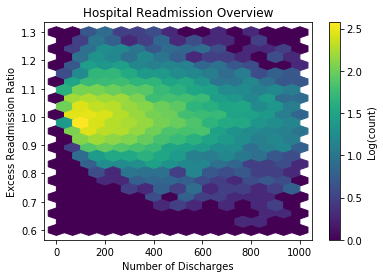

In [113]:
plt.hexbin(df['Number of Discharges'],df['Excess Readmission Ratio'], gridsize=(15,12), extent=(0,1000,0.6, 1.3), bins='log')
           
# Add a color bar to the histogram
plt.colorbar(label='Log(count)')

# Add labels, title, and display the plot
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Hospital Readmission Overview')
plt.show()